In [9]:
from sklearn.datasets import load_wine
import pandas as pd
from sdv.metadata import Metadata
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


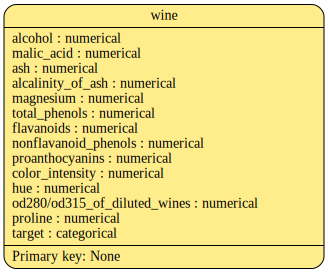

In [6]:
metadata = Metadata.detect_from_dataframes({"wine": df})
metadata.visualize()

In [8]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.64,2.62,2.50,17.1,98.0,2.61,3.42,0.26,2.04,2.912567,1.205,3.85,465.0,0
1,13.18,2.12,2.41,22.6,94.0,2.01,0.80,0.54,1.69,3.889195,0.906,3.36,514.0,2
2,14.32,2.65,2.22,17.1,95.0,2.54,2.83,0.31,1.49,8.901528,0.704,2.86,1018.0,1
3,11.99,1.85,2.00,19.6,84.0,2.36,1.37,0.40,1.72,2.204925,0.962,2.92,400.0,1
4,13.43,3.79,2.08,19.1,115.0,1.46,0.57,0.21,1.54,4.735889,0.935,1.37,837.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.92,1.70,2.64,20.1,100.0,1.68,1.02,0.52,1.42,11.423966,0.517,2.27,645.0,0
496,13.87,1.05,2.43,19.2,101.0,2.41,1.47,0.23,2.04,7.937406,0.673,2.84,358.0,1
497,14.17,0.99,2.85,19.9,98.0,3.29,4.88,0.17,2.45,2.933788,1.442,3.99,1574.0,0
498,12.55,0.89,2.55,17.6,121.0,2.94,2.63,0.36,1.78,5.109518,1.247,2.49,362.0,0


In [20]:
diagnostic = run_diagnostic(df, synthetic_data, metadata)
diagnostic.get_details(property_name='Data Validity')

Generating report ...

(1/2) Evaluating Data Validity: |████████████████████████████| 14/14 [00:00<00:00, 1788.67it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████████████████████| 1/1 [00:00<00:00, 401.71it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



,Column,Metric,Score
0,alcohol,BoundaryAdherence,1.0
1,malic_acid,BoundaryAdherence,1.0
2,ash,BoundaryAdherence,1.0
3,alcalinity_of_ash,BoundaryAdherence,1.0
4,magnesium,BoundaryAdherence,1.0
5,total_phenols,BoundaryAdherence,1.0
6,flavanoids,BoundaryAdherence,1.0
7,nonflavanoid_phenols,BoundaryAdherence,1.0
8,proanthocyanins,BoundaryAdherence,1.0
9,color_intensity,BoundaryAdherence,1.0


In [18]:
quality_report = evaluate_quality(df, synthetic_data, metadata)
quality_report.get_details(property_name='Column Shapes')

Generating report ...

(1/2) Evaluating Column Shapes: |█████████████████████████████| 14/14 [00:00<00:00, 977.12it/s]|
Column Shapes Score: 90.43%

(2/2) Evaluating Column Pair Trends: |████████████████████████| 91/91 [00:00<00:00, 300.40it/s]|
Column Pair Trends Score: 92.7%

Overall Score (Average): 91.56%



,Column,Metric,Score
0,alcohol,KSComplement,0.931303
1,malic_acid,KSComplement,0.857775
2,ash,KSComplement,0.945730
3,alcalinity_of_ash,KSComplement,0.937281
4,magnesium,KSComplement,0.952652
5,total_phenols,KSComplement,0.910854
6,flavanoids,KSComplement,0.837438
7,nonflavanoid_phenols,KSComplement,0.914854
8,proanthocyanins,KSComplement,0.803708
9,color_intensity,KSComplement,0.928854


In [12]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='target'
)
    
fig.show()

Generating report ...

(1/2) Evaluating Data Validity: |████████████████████████████| 14/14 [00:00<00:00, 1838.63it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████████████████████| 1/1 [00:00<00:00, 483.33it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |████████████████████████████| 14/14 [00:00<00:00, 1101.88it/s]|
Column Shapes Score: 90.43%

(2/2) Evaluating Column Pair Trends: |████████████████████████| 91/91 [00:00<00:00, 299.88it/s]|
Column Pair Trends Score: 92.7%

Overall Score (Average): 91.56%

